<a href="https://colab.research.google.com/github/vitroid/DelaunayExtrapolation/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install delaunayextrapolation

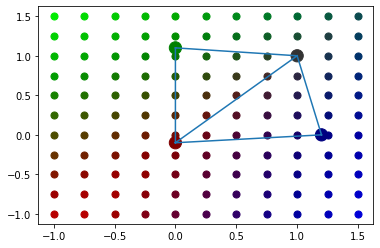

In [ ]:
from delaunayextrapolation import DelaunayE
from matplotlib import pyplot as plt
import numpy as np

# Representative points
points = np.array([[0, -0.1], [0, 1.1], [1.2, 0], [1, 1]])

# Delaunay Triangulation
tri = DelaunayE(points)

# Values at the representative points.
colors = np.array([[0.5, 0.0, 0.0],     #dark red
                   [0.0, 0.5, 0.0],     #dark green
                   [0.0, 0.0, 0.5],     #dark blue
                   [0.2, 0.2, 0.2]])   #90% gray

# Grid points
p = []
for ix in range(11):
    for iy in range(11):
        x, y = ix/4-1, iy/4-1
        p = np.array([x, y])
        # determine the vertices of the triangle that include p, and their mixing ratio
        v, mix = tri.mixratio(p)
        # Mix the colors at the representative points using the mixing ratio
        mixedcolor = mix @ colors[v]
        # In a more crude way,
        # mixedcolor = mix[0]* colors[v[0]] + mix[1]* colors[v[1]] +mix[0]* colors[v[2]] 
        # Clip the value within 0 and 1.
        mixedcolor = np.clip(mixedcolor, 0.0, 1.0)

        # Scatter plot with that color.
        plt.scatter(x, y, s=50, facecolor=mixedcolor)

# Draw the triangles
plt.triplot(points[:,0], points[:,1], tri.simplices)
# and the representative points
plt.scatter(points[:,0], points[:,1], s=150, facecolor=colors)
plt.show()

In [28]:
# another sample
from delaunayextrapolation import DelaunayE
import plotly.graph_objects as go 
import numpy as np 

np.random.seed(19680801)

# reference points
N = 100
x = np.random.rand(N) * 2 - 1
y = np.random.rand(N) * 2 - 1
z = np.exp(-8*(x**2+y**2))   #gaussian bell

points = np.vstack([x,y]).T
tri = DelaunayE(points)

# interpolated values
X = np.linspace(-1.2,1.2, 50)
Y = np.linspace(-1.2,1.2,50)
xv, yv = np.meshgrid(X,Y)
interp = np.zeros_like(xv)
for ix in range(xv.shape[0]):
    for iy in range(xv.shape[1]):
        # a gridpoint
        xy = np.array([xv[ix,iy], yv[ix,iy]])
        v, mix = tri.mixratio(xy)
        interp[ix,iy] = mix @ z[v]
  
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=interp)]) 
fig.add_scatter3d(x=x, y=y, z=z,
                                   mode='markers', marker=dict(size=2))

fig.show() 
